# Exercício

O conjunto de dados de notas de banco envolve a previsão da autenticidade de uma determinada nota de banco com base em uma série de medidas tiradas de uma fotografia.

Trata-se de um problema de classificação binária (2 classes). O número de observações para cada classe não é equilibrado. Há 1.372 observações com 4 variáveis de entrada e 1 variável de saída. Para obter mais informações, consulte [este link](http://archive.ics.uci.edu/ml/datasets/banknote+authentication).


## Obtendo os dados:

In [2]:
import urllib.request

url = "http://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt"
filename = "data_banknote_authentication.txt"
urllib.request.urlretrieve(url, filename)
print("Download concluído!")

Download concluído!


In [3]:
import pandas as pd

In [4]:
banknote_dataset = pd.read_csv("data_banknote_authentication.txt", header = None)

In [5]:
banknote_dataset.head(10)

,0,1,2,3,4
0,3.62160,8.6661,-2.80730,-0.44699,0
1,4.54590,8.1674,-2.45860,-1.46210,0
2,3.86600,-2.6383,1.92420,0.10645,0
3,3.45660,9.5228,-4.01120,-3.59440,0
4,0.32924,-4.4552,4.57180,-0.98880,0
5,4.36840,9.6718,-3.96060,-3.16250,0
6,3.59120,3.0129,0.72888,0.56421,0
7,2.09220,-6.8100,8.46360,-0.60216,0
8,3.20320,5.7588,-0.75345,-0.61251,0
9,1.53560,9.1772,-2.27180,-0.73535,0


## Exercícios:

1. Crie classificadores de [Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html) e de regressão logística;
1. Realize validações cruzadas em ambos os modelos para selecionar os melhores modelos treinados;
    1. Criar a matriz de confusão para mostrar as diferenças entre parâmetros

1. Salvar o melhor modelo usando a biblioteca Pickle Python (consulte [este link](https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/) para referência)




In [7]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import pickle
import numpy as np 
from sklearn.model_selection import StratifiedKFold, cross_validate, train_test_split 
from sklearn.linear_model import LogisticRegression 

X = banknote_dataset.iloc[:, :-1]
y = banknote_dataset.iloc[:, -1]

# 1. Crie classificadores de Naive Bayes e de regressão logística

nb_model = GaussianNB()

model = LogisticRegression(random_state=0) 

# 2. Realize validações cruzadas em ambos os modelos para selecionar os melhores modelos treinados;

cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


nb_scores = cross_validate(nb_model, X, y, cv=cv_strategy, scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'], return_estimator=True)

print("Naive Bayes Cross-Validation Results:")
print(f"Fit times: {nb_scores['fit_time'].mean():.3f} (+/- {nb_scores['fit_time'].std()*2:.3f})")
print(f"Score times: {nb_scores['score_time'].mean():.3f} (+/- {nb_scores['score_time'].std()*2:.3f})")
print(f"Test Accuracy: {nb_scores['test_accuracy'].mean():.3f} (+/- {nb_scores['test_accuracy'].std()*2:.3f})")
print(f"Test Precision: {nb_scores['test_precision_macro'].mean():.3f} (+/- {nb_scores['test_precision_macro'].std()*2:.3f})")
print(f"Test Recall: {nb_scores['test_recall_macro'].mean():.3f} (+/- {nb_scores['test_recall_macro'].std()*2:.3f})")
print(f"Test F1-score: {nb_scores['test_f1_macro'].mean():.3f} (+/- {nb_scores['test_f1_macro'].std()*2:.3f})")
print("-" * 30)


lr_scores = cross_validate(model, X, y, cv=cv_strategy, scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'], return_estimator=True)

print("Logistic Regression Cross-Validation Results:")
print(f"Fit times: {lr_scores['fit_time'].mean():.3f} (+/- {lr_scores['fit_time'].std()*2:.3f})")
print(f"Score times: {lr_scores['score_time'].mean():.3f} (+/- {lr_scores['score_time'].std()*2:.3f})")
print(f"Test Accuracy: {lr_scores['test_accuracy'].mean():.3f} (+/- {lr_scores['test_accuracy'].std()*2:.3f})")
print(f"Test Precision: {lr_scores['test_precision_macro'].mean():.3f} (+/- {lr_scores['test_precision_macro'].std()*2:.3f})")
print(f"Test Recall: {lr_scores['test_recall_macro'].mean():.3f} (+/- {lr_scores['test_recall_macro'].std()*2:.3f})")
print(f"Test F1-score: {lr_scores['test_f1_macro'].mean():.3f} (+/- {lr_scores['test_f1_macro'].std()*2:.3f})")
print("-" * 30)

if nb_scores['test_accuracy'].mean() > lr_scores['test_accuracy'].mean():
    best_model = nb_scores['estimator'][np.argmax(nb_scores['test_accuracy'])]
    print("Best model is Naive Bayes based on average test accuracy.")
else:
    best_model = lr_scores['estimator'][np.argmax(lr_scores['test_accuracy'])]
    print("Best model is Logistic Regression based on average test accuracy.")



X_train_fold, X_test_fold, y_train_fold, y_test_fold = train_test_split(X, y, test_size=1/5, random_state=42, stratify=y) 

nb_predictions_fold = nb_scores['estimator'][0].predict(X_test_fold)
nb_cm = confusion_matrix(y_test_fold, nb_predictions_fold)
print("\nConfusion Matrix for Naive Bayes (first fold):")
print(nb_cm)

lr_predictions_fold = lr_scores['estimator'][0].predict(X_test_fold)
lr_cm = confusion_matrix(y_test_fold, lr_predictions_fold)
print("\nConfusion Matrix for Logistic Regression (first fold):")
print(lr_cm)


# 3. Salvar o melhor modelo usando a biblioteca Pickle Python
filename = 'best_model.pkl'
pickle.dump(best_model, open(filename, 'wb'))

print(f"\nBest model saved to {filename}")


Naive Bayes Cross-Validation Results:
Fit times: 0.002 (+/- 0.001)
Score times: 0.005 (+/- 0.003)
Test Accuracy: 0.840 (+/- 0.037)
Test Precision: 0.840 (+/- 0.035)
Test Recall: 0.835 (+/- 0.041)
Test F1-score: 0.837 (+/- 0.039)
------------------------------
Logistic Regression Cross-Validation Results:
Fit times: 0.005 (+/- 0.002)
Score times: 0.005 (+/- 0.002)
Test Accuracy: 0.990 (+/- 0.012)
Test Precision: 0.989 (+/- 0.012)
Test Recall: 0.990 (+/- 0.011)
Test F1-score: 0.990 (+/- 0.012)
------------------------------
Best model is Logistic Regression based on average test accuracy.

Confusion Matrix for Naive Bayes (first fold):
[[136  17]
 [ 23  99]]

Confusion Matrix for Logistic Regression (first fold):
[[149   4]
 [  0 122]]

Best model saved to best_model.pkl


In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay


Confusion Matrix for Naive Bayes (first fold):


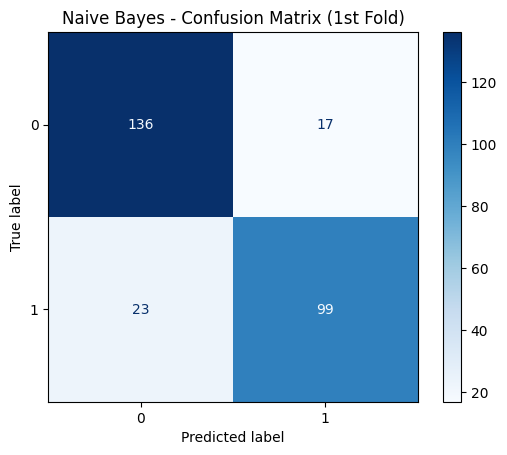

In [9]:
print("\nConfusion Matrix for Naive Bayes (first fold):")
disp_nb = ConfusionMatrixDisplay(confusion_matrix=nb_cm)
disp_nb.plot(cmap=plt.cm.Blues)
plt.title("Naive Bayes - Confusion Matrix (1st Fold)")
plt.show()



Confusion Matrix for Logistic Regression (first fold):


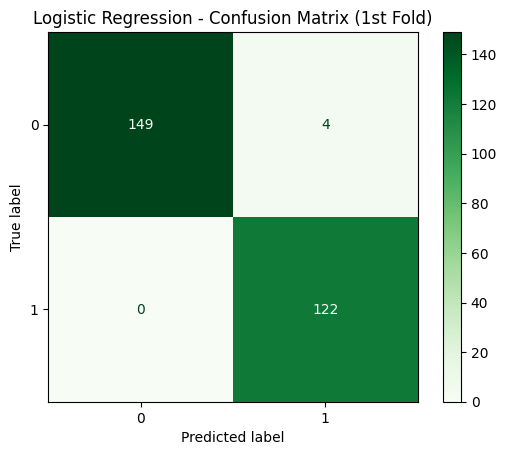

In [10]:
print("\nConfusion Matrix for Logistic Regression (first fold):")
disp_lr = ConfusionMatrixDisplay(confusion_matrix=lr_cm)
disp_lr.plot(cmap=plt.cm.Greens)
plt.title("Logistic Regression - Confusion Matrix (1st Fold)")
plt.show()
